# **Final Project**

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

## Load required libraries

In [94]:
import re
import pandas as pd 
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Working directory

In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

## Load data

### Load the raw files

In [50]:
# Define a function for reading prolog files
def read_prolog_file(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content

In [51]:
# read the no_payment_due.pl and extract StudentID and NoPaymentDue
content1 = read_prolog_file(filename='datasets\\no_payment_due.pl')

facts = []
for line in content1:
    match = re.match(r'no_payment_due\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, status = match.groups()
        facts.append([studentid, status])
        
df1 = pd.DataFrame(facts, columns=['StudentID', 'NoPaymentDue'])
display(df1.head(), df1.shape)

,StudentID,NoPaymentDue
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


(1000, 2)

In [52]:
# change the datatype of StudentID to int
df1['StudentID'] = df1['StudentID'].astype(int)

In [53]:
# Enlisted file for Enlisted and Service
content2 = read_prolog_file(filename='datasets\\enlist.pl')

facts = []
for line in content2:
    match = re.match(r'enlist\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, service = match.groups()
        facts.append([studentid, service])

df2 = pd.DataFrame(facts, columns=['StudentID', 'Service'])
display(df2.head(), df2.shape)

,StudentID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


(306, 2)

In [54]:
# change the datatype of StudentID to int
df2['StudentID'] = df2['StudentID'].astype(int)

In [55]:
# read Disabled file for Disabled
content3 = read_prolog_file(filename='datasets\\disabled.pl')

facts = []
for line in content3:
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Disabled'])

df3 = pd.DataFrame(facts, columns=['StudentID', 'Disabled'])
display(df3.head(), df3.shape)

,StudentID,Disabled
0,992,Disabled
1,976,Disabled
2,963,Disabled
3,918,Disabled
4,913,Disabled


(95, 2)

In [56]:
# change the datatype of StudentID to int
df3['StudentID'] = df3['StudentID'].astype(int)

In [57]:
# read Unemployed file for Unemployed
content4 = read_prolog_file(filename='datasets\\unemployed.pl')

facts = []
for line in content4:
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Unemployed'])

df4 = pd.DataFrame(facts, columns=['StudentID', 'Unemployed'])
display(df4.head(), df4.shape)

,StudentID,Unemployed
0,1000,Unemployed
1,996,Unemployed
2,993,Unemployed
3,948,Unemployed
4,946,Unemployed


(98, 2)

In [58]:
# change the datatype of StudentID to int
df4['StudentID'] = df4['StudentID'].astype(int)

In [59]:
# read Enrolled file for Enrolled and School
content5 = read_prolog_file(filename = 'datasets\\enrolled.pl')

facts = []
for line in content5:
    match = re.match(r'enrolled\(student(\d+),(.+),(.+)\)\.', line.strip())
    if match:
        studentid, school, units = match.groups()
        facts.append([studentid, school, units])

df5 = pd.DataFrame(facts, columns=['StudentID', 'School', 'Units'])
display(df5.head(), df5.shape)

,StudentID,School,Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


(1194, 3)

In [60]:
# change the data type of Units from object to int
df5['Units'] = df5['Units'].astype(int)

# change the datatype of StudentID to int
df5['StudentID'] = df5['StudentID'].astype(int)

In [61]:
# read Region file for Country, Region, Marital_Status
# from Region,Martial Status.xlsx
df6 = pd.read_excel('datasets\Region, Marital Status.xlsx')
df6.columns = ['StudentID', 'Country', 'Region', 'Marital_Status']
display(df6.head(), df6.shape)

,StudentID,Country,Region,Marital_Status
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


(1000, 4)

In [62]:
# change the datatype of StudentID, Region, Marital_Status to int
df6['StudentID'] = df6['StudentID'].astype(int)
df6['Region'] = df6['Region'].astype(int)
df6['Marital_Status'] = df6['Marital_Status'].astype(int)

In [63]:
# read male.pl for Gender
content7 = read_prolog_file(filename = 'datasets\\male.pl')

facts = []
for line in content7:
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0],'Male'])

df7 = pd.DataFrame(facts,columns=['StudentID', 'Gender'])
display(df7.head(), df7.shape)
        

,StudentID,Gender
0,997,Male
1,994,Male
2,992,Male
3,987,Male
4,986,Male


(497, 2)

In [64]:
# change the datatype of StudentID to int
df7['StudentID'] = df7['StudentID'].astype(int)

In [65]:
# read longest_absense_from_school.pl for Longest_Absence_From_School
content8 = read_prolog_file(filename = 'datasets\\longest_absense_from_school.pl')

facts = []
for line in content8:
    match = re.match(r'longest_absense_from_school\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, months = match.groups()
        facts.append([studentid, months])

df8 = pd.DataFrame(facts,columns=['StudentID', 'Longest_Absence_From_School'])
display(df8.head(), df8.shape)

,StudentID,Longest_Absence_From_School
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


(1000, 2)

In [66]:
# change the datatype of StudentID to int
df8['StudentID'] = df8['StudentID'].astype(int)

In [67]:
# read filed_for_bankrupcy.pl for Filed_For_Bankruptcy
content9 = read_prolog_file(filename = 'datasets\\filed_for_bankrupcy.pl')

facts = []
for line in content9:
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Filed_For_Bankruptcy'])

df9 = pd.DataFrame(facts,columns=['StudentID', 'Filed_For_Bankruptcy'])
display(df9.head(), df9.shape)

,StudentID,Filed_For_Bankruptcy
0,999,Filed_For_Bankruptcy
1,998,Filed_For_Bankruptcy
2,958,Filed_For_Bankruptcy
3,956,Filed_For_Bankruptcy
4,953,Filed_For_Bankruptcy


(96, 2)

In [68]:
# change the datatype of StudentID to int
df9['StudentID'] = df9['StudentID'].astype(int)

In [69]:
# read Personality Characteristics file for LongTermPlanningScore, DecisionStyle, PowerOrientedScore, CommunityOrientedScore
df10 = pd.read_excel('datasets\Personality Characteristics Data.xlsx')
df10.columns = ['StudentID', 'LongTermPlanningScore', 'DecisionStyle', 'PowerOrientedScore', 'CommunityOrientedScore']
display(df10.head(), df10.shape)

,StudentID,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


(1000, 5)

In [70]:
# change the datatype of StudentID to int
df10['StudentID'] = df10['StudentID'].astype(int)

# change the datatype of LongTermPlanningScore, PowerOrientedScore, CommunityOrientedScore to float
df10['LongTermPlanningScore'] = df10['LongTermPlanningScore'].astype(float)
df10['PowerOrientedScore'] = df10['PowerOrientedScore'].astype(float)
df10['CommunityOrientedScore'] = df10['CommunityOrientedScore'].astype(float)

In [71]:
# read Family_Income file for Family_Income
df11 = pd.read_excel('datasets\Family_Income.xlsx')
df11.columns = ['StudentID', 'Family_Income']
display(df11.head(), df11.shape)

,StudentID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


(1000, 2)

In [72]:
# change the datatype of StudentID to int
df11['StudentID'] = df11['StudentID'].astype(int)

# change the datatype of Family_Income to float
df11['Family_Income'] = df11['Family_Income'].astype(float)

In [73]:
# Parents_Education file for Parent_Education_Level
df12 = pd.read_excel('datasets\Parents_Education.xlsx')
df12.columns = ['StudentID', 'Parent_Education_Level']
display(df12.head(), df12.shape)

,StudentID,Parent_Education_Level
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


(1000, 2)

In [74]:
# change the datatype of StudentID to int
df12['StudentID'] = df12['StudentID'].astype(int)

In [75]:
# read CreditRating Data 2012.xlsx for Credit_Score_Raw and Credit_Score_AgeAdj
df13 = pd.read_excel('datasets\CreditRating Data 2012.xlsx')
df13.columns = ['StudentID', 'Credit_Score_Raw', 'Credit_Score_AgeAdj']
display(df13.head(), df13.shape)

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


(1000, 3)

In [76]:
# change the datatype of StudentID to int
df13['StudentID'] = df13['StudentID'].astype(int)

# change the datatype of Credit_Score_Raw, Credit_Score_AgeAdj to float
df13['Credit_Score_Raw'] = df13['Credit_Score_Raw'].astype(float)

In [77]:
# read LoanAmount.xlsx for Loan_Amount
df14 = pd.read_excel('datasets\LoanAmount.xlsx')
df14.columns = ['StudentID', 'Loan_Amount']
display(df14.head(), df14.shape)

,StudentID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


(1000, 2)

In [78]:
# change the datatype of StudentID and Loan_Amount to int
df14['StudentID'] = df14['StudentID'].astype(int)
df14['Loan_Amount'] = df14['Loan_Amount'].astype(int)


In [79]:
# read HS_Academics 2012.xlsx for HS_Math, HS_Science, HS_English
df15 = pd.read_excel('datasets\HS_Academics 2012.xlsx')
df15.columns = ['StudentID', 'HS_Math', 'HS_Science', 'HS_English']
display(df15.head(), df15.shape)

,StudentID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


(1000, 4)

In [80]:
# change the datatype of StudentID to int
df15['StudentID'] = df15['StudentID'].astype(int)

# change the datatype of HS_Math, HS_Science, HS_English to float
df15['HS_Math'] = df15['HS_Math'].astype(float)
df15['HS_Science'] = df15['HS_Science'].astype(float)
df15['HS_English'] = df15['HS_English'].astype(float)


### Merge the raw files

In [81]:
# Add 'Enlisted' and 'Enrolled' columns to df1
df1['Enlisted'] = df1['StudentID'].apply(lambda x: 1 if x in df2['StudentID'].values else 0)
df1['Enrolled'] = df1['StudentID'].apply(lambda x: 1 if x in df5['StudentID'].values else 0)

df2_agg = df2.groupby('StudentID').agg(TotalServices=('Service', 'count'), Service=('Service', lambda x: ';'.join(x))).reset_index()

# Update the aggregation for df5_agg to include the sum of Units
df5_agg = df5.groupby('StudentID').agg(TotalSchools=('School', 'count'), School=('School', lambda x: ';'.join(x)), Units=('Units', 'sum')).reset_index()

df_agg = df1.merge(df2_agg, on='StudentID', how='left').merge(df5_agg, on='StudentID', how='left')

# Drop the TotalServices and TotalSchools columns
df_agg.drop(['TotalServices', 'TotalSchools'], axis=1, inplace=True)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units
0,1000,pos,1,1,air_force,ucsd;occ,14.0
1,999,pos,1,1,fire_department,smc,4.0
2,998,pos,0,1,NaN,ucb;smc,2.0
3,996,pos,1,1,navy,smc,11.0
4,994,pos,0,1,NaN,uci,9.0


(1000, 7)

In [82]:
# merge df_agg with df3
# Disabled: 1 if the corresponding StudentId in df3 is in df1; 0 otherwise
df_agg = df_agg.merge(df3, on='StudentID', how='left')
df_agg['Disabled'] = df_agg['Disabled'].apply(lambda x: 1 if pd.notnull(x) else 0)

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0
1,999,pos,1,1,fire_department,smc,4.0,0
2,998,pos,0,1,NaN,ucb;smc,2.0,0
3,996,pos,1,1,navy,smc,11.0,0
4,994,pos,0,1,NaN,uci,9.0,0


(1000, 8)

In [83]:
# add Unemployed column to df_agg by using df4
# Unemployed: 1 if the corresponding StudentId in df4 is in df1; 0 otherwise
df_agg = df_agg.merge(df4, on='StudentID', how='left')
df_agg['Unemployed'] = df_agg['Unemployed'].apply(lambda x: 1 if pd.notnull(x) else 0)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1
1,999,pos,1,1,fire_department,smc,4.0,0,0
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0
3,996,pos,1,1,navy,smc,11.0,0,1
4,994,pos,0,1,NaN,uci,9.0,0,0


(1000, 9)

In [84]:
# merge df_agg and df6
df_agg = df_agg.merge(df6, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1


(1000, 12)

In [85]:
# merge df_agg and df7
# Gender: 1 if the corresponding StudentId is in df7; 0 otherwise
df_agg = df_agg.merge(df7, on='StudentID', how='left')
df_agg['Gender'] = df_agg['Gender'].apply(lambda x: 1 if pd.notnull(x) else 0)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1,0
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1,0
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0,0
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1,0
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1,1


(1000, 13)

In [86]:
# merge df_agg and df8
df_agg = df_agg.merge(df8, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1,0,7
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1,0,4
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0,0,1
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1,0,7
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1,1,1


(1000, 14)

In [87]:
# merge df_agg and df9
df_agg = df_agg.merge(df9, on='StudentID', how='left')
df_agg['Filed_For_Bankruptcy'] = df_agg['Filed_For_Bankruptcy'].apply(lambda x: 1 if pd.notnull(x) else 0)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1,0,7,0
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1,0,4,1
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0,0,1,1
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1,0,7,0
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1,1,1,0


(1000, 15)

In [88]:
# merge df_agg and df10, df11, df12, df13, df14, df15
df_agg = df_agg.merge(df10, on='StudentID', how='left')
df_agg = df_agg.merge(df11, on='StudentID', how='left')
df_agg = df_agg.merge(df12, on='StudentID', how='left')
df_agg = df_agg.merge(df13, on='StudentID', how='left')
df_agg = df_agg.merge(df14, on='StudentID', how='left')
df_agg = df_agg.merge(df15, on='StudentID', how='left')

In [95]:
display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1,0,7,0,0.843289,Emotional,0.808111,0.569837,54206.48,Bachelor's,0.639912,0.808111,16823,10.0,10.0,9.0
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1,0,4,1,0.662624,Analytical,1.000000,0.004697,65238.16,HS or Lower,0.989682,0.597839,16943,9.0,9.0,6.0
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0,0,1,1,0.994214,Analytical,0.855013,0.441015,67495.76,Doctorate,0.777285,0.441015,6178,8.0,9.0,5.0
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1,0,7,0,0.889289,Emotional,0.780557,0.301059,83784.09,HS or Lower,0.612762,0.780557,17924,9.0,10.0,10.0
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1,1,1,0,0.860842,Emotional,0.829191,0.467755,104457.91,Doctorate,0.585587,0.829191,19106,9.0,9.0,4.0


(1000, 27)

In [43]:
# save the dataframe to csv called 'merged_raw_data.csv'
df_agg.to_csv('datasets\merged_raw_data.csv', index=False)

In [47]:
# count missing values in School, Service, and Units columns in df_agg
display(df_agg[['School', 'Service']].isnull().sum())


School      40
Service    717
dtype: int64

In [96]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [121]:
# Perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    else:
        mean = df[column].mean() # mean
        std_dev = df[column].std() # standard deviation
        # Calculate interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1 # interquartile range
        outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range
        outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
        outliers = outliers[column].values # outlier values

        print(f"Mean of {column}: {mean:.2f}")
        print(f"Standard deviation of {column}: {std_dev:.2f}")
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("Outliers values:")
        print(outliers)

        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Box plot of {column}") # Box plot
        plt.show()

        if df[column].nunique() >= 10:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
            plt.title(f"Histogram of {column}")
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.show()

In [91]:
metadata(df_agg)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN
2,Enlisted,int64,0,0.0,2,0.2,0.000000,1.000000,0.450682
3,Enrolled,int64,0,0.0,2,0.2,0.000000,1.000000,0.196057
4,Service,object,717,71.7,14,1.4,NaN,NaN,NaN
5,School,object,40,4.0,14,1.4,NaN,NaN,NaN
6,Units,float64,40,4.0,20,2.0,1.000000,21.000000,4.032403
7,Disabled,int64,0,0.0,2,0.2,0.000000,1.000000,0.293362
8,Unemployed,int64,0,0.0,2,0.2,0.000000,1.000000,0.297463
9,Country,object,0,0.0,2,0.2,NaN,NaN,NaN


Counts and percentages of unique values in Service:

                                 Count  Percentage
Service                                           
fire_department                     88   31.095406
navy                                34   12.014134
peace_corps                         30   10.600707
marines                             29   10.247350
army                                29   10.247350
foreign_legion                      27    9.540636
air_force                           23    8.127208
fire_department;army                 6    2.120141
fire_department;foreign_legion       4    1.413428
fire_department;navy                 3    1.060071
fire_department;fire_department      3    1.060071
fire_department;air_force            3    1.060071
fire_department;marines              2    0.706714
fire_department;peace_corps          2    0.706714


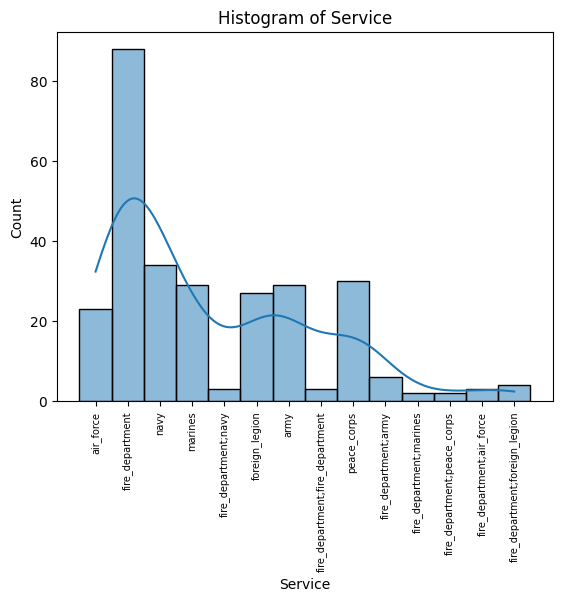

In [122]:
data_exploration(df_agg, 'Service')

Counts and percentages of unique values in NoPaymentDue:

              Count  Percentage
NoPaymentDue                   
pos             643        64.3
neg             357        35.7


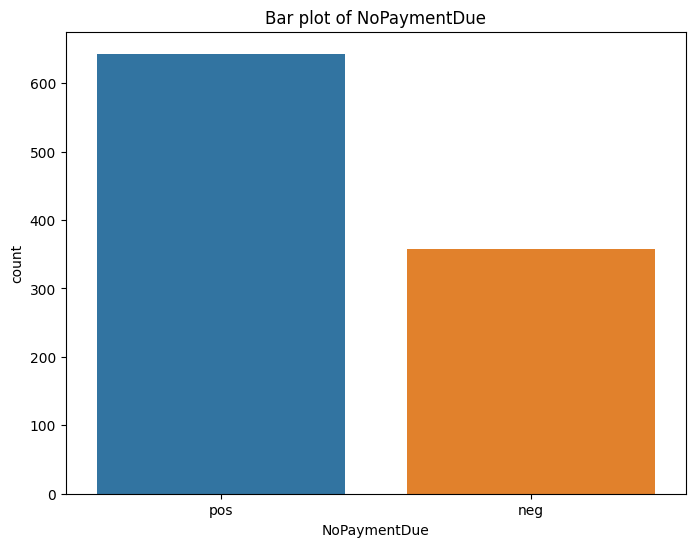

In [108]:
data_exploration(df_agg, 'NoPaymentDue')

In [124]:
df_agg.head(30)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English
0,1000,pos,1,1,air_force,ucsd;occ,14.0,0,1,USA,1,1,0,7,0,0.843289,Emotional,0.808111,0.569837,54206.48,Bachelor's,0.639912,0.808111,16823,10.0,10.0,9.0
1,999,pos,1,1,fire_department,smc,4.0,0,0,USA,2,1,0,4,1,0.662624,Analytical,1.000000,0.004697,65238.16,HS or Lower,0.989682,0.597839,16943,9.0,9.0,6.0
2,998,pos,0,1,NaN,ucb;smc,2.0,0,0,USA,5,0,0,1,1,0.994214,Analytical,0.855013,0.441015,67495.76,Doctorate,0.777285,0.441015,6178,8.0,9.0,5.0
3,996,pos,1,1,navy,smc,11.0,0,1,USA,3,1,0,7,0,0.889289,Emotional,0.780557,0.301059,83784.09,HS or Lower,0.612762,0.780557,17924,9.0,10.0,10.0
4,994,pos,0,1,NaN,uci,9.0,0,0,USA,3,1,1,1,0,0.860842,Emotional,0.829191,0.467755,104457.91,Doctorate,0.585587,0.829191,19106,9.0,9.0,4.0
5,993,pos,1,1,fire_department,ucb,6.0,0,1,USA,1,0,0,4,0,0.809411,Emotional,0.767735,0.044467,99421.84,Bachelor's,0.473408,0.767735,17135,7.0,8.0,7.0
6,992,pos,1,1,marines,ucsd;smc,12.0,1,0,USA,3,0,1,7,0,0.941271,Emotional,0.806621,0.552842,85207.17,HS or Lower,0.655463,0.806621,18260,9.0,10.0,8.0
7,990,pos,0,1,NaN,smc,10.0,0,0,USA,3,1,0,4,0,0.553502,Emotional,0.561046,0.477419,76995.90,Bachelor's,0.510042,0.477419,19735,6.0,6.0,7.0
8,989,pos,0,1,NaN,ucla,12.0,0,0,USA,3,0,0,9,0,0.693413,Emotional,0.632762,0.632761,58579.26,HS or Lower,0.525709,0.632762,19899,10.0,10.0,8.0
9,987,pos,0,1,NaN,occ,12.0,0,0,USA,3,1,1,5,0,0.824561,Emotional,0.785739,0.785739,100373.38,Doctorate,0.501800,0.785739,19587,7.0,8.0,8.0
